# Подключение модуля (import)

In [92]:
# Библиотека matplotlib
import matplotlib

# Библиотека matplotlib -> mcolors
import matplotlib.colors as mcolors

# Библиотека PIL -> Image
from PIL import Image

# Библиотека requests
import requests

# Библиотека BytesIO
from io import BytesIO

# Библиотека NumPy
import numpy as np

# Примеры

## Линейный график

### Построение графика

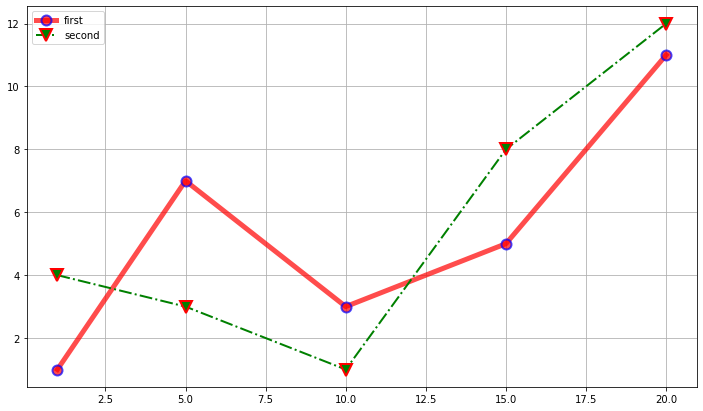

In [7]:
x = [1, 5, 10, 15, 20]
y1 = [1, 7, 3, 5, 11]
y2 = [4, 3, 1, 8, 12]

plt.figure(figsize=(12, 7))
plt.plot(x, y1, 'o-r', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)
plt.plot(x, y2, 'v-.g', label="second", mec='r', lw=2, mew=2, ms=12)

plt.legend()
plt.grid(True)

### Заливка области между графиком и осью

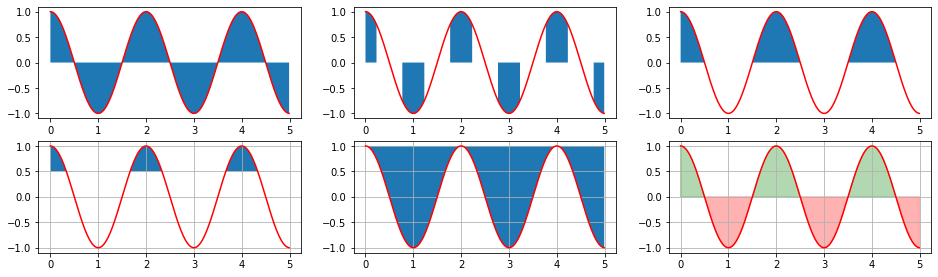

In [34]:
x = np.arange(0.0, 5, 0.01)
y = np.cos(x*np.pi)

# Настройка размеров подложки
plt.figure(figsize=(16, 7))

plt.subplot(3, 3, 1)
plt.plot(x, y, c = "r")
plt.fill_between(x, y)

plt.subplot(3, 3, 2)
plt.plot(x, y, c="r")
plt.fill_between(x, y, where=(y > 0.75) | (y < -0.75))

plt.subplot(3, 3, 3)
plt.plot(x, y, c="r")
plt.fill_between(x, y, where=(y > 0))

plt.subplot(3, 3, 4)
plt.plot(x, y, c="r")
plt.grid()
plt.fill_between(x, 0.5, y, where=(y>=0.5))

plt.subplot(3, 3, 5)
plt.plot(x, y, c="r")
plt.grid()
plt.fill_between(x, y, 1)

plt.subplot(3, 3, 6)
plt.plot(x, y, c="r")
plt.grid()
plt.fill_between(x, y, where=y>=0, color="g", alpha=0.3)
plt.fill_between(x, y, where=y<=0, color="r", alpha=0.3)

plt.show()

## Настройка маркировки графиков

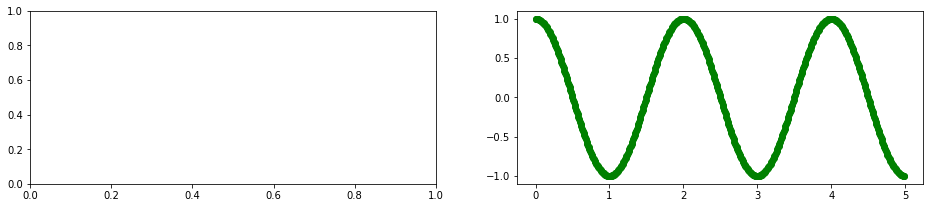

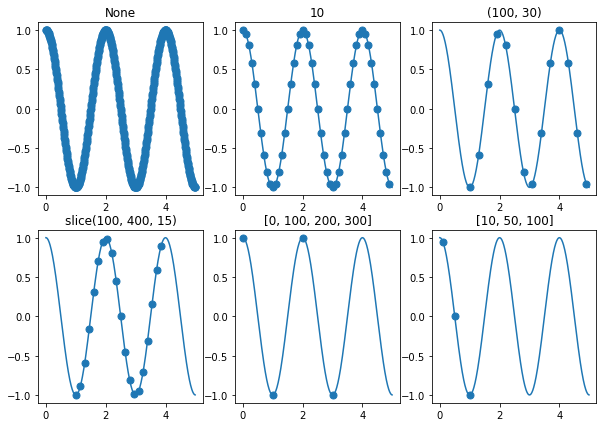

In [47]:
x = [1, 2, 3, 4, 5, 6, 7]
y = [7, 6, 5, 4, 5, 6, 7]

# Настройка размеров подложки
plt.figure(figsize=(16, 7))

plt.plot(x, y, marker="o", c="g")
plt.subplot(2, 2, 1)

x = np.arange(0.0, 5, 0.01)
y = np.cos(x*np.pi)
plt.subplot(2, 2, 2)

plt.plot(x, y, marker="o", c="g")
plt.show()

x = np.arange(0.0, 5, 0.01)
y = np.cos(x * np.pi)
m_ev_case = [None, 10, (100, 30), slice(100,400,15), [0, 100, 200, 300], [10, 50, 100]]
fig, ax = plt.subplots(2, 3, figsize=(10, 7))
axs = [ax[i, j] for i in range(2) for j in range(3)]

for i, case in enumerate(m_ev_case):
    axs[i].set_title(str(case))
    axs[i].plot(x, y, "o", ls='-', ms=7, markevery=case)
    
plt.show()

## Обрезка графика

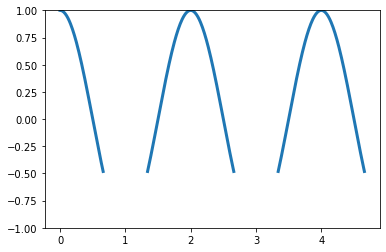

In [51]:
x = np.arange(0.0, 5, 0.01)
y = np.cos(x * np.pi)

y_masked = np.ma.masked_where(y < -0.5, y)

plt.ylim(-1, 1)
plt.plot(x, y_masked, linewidth=3)

plt.show()

## Ступенчатый график

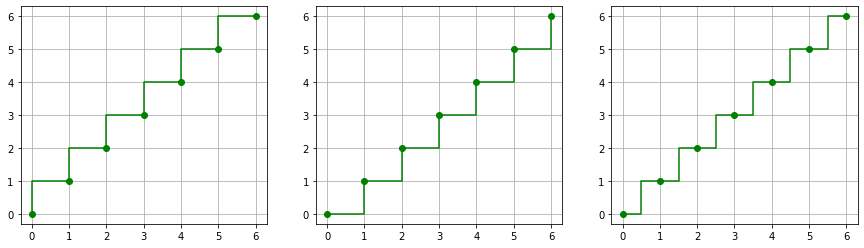

In [52]:
x = np.arange(0, 7)
y = x

where_set = ['pre', 'post', 'mid']
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for i, ax in enumerate(axs):
    ax.step(x, y, "g-o", where=where_set[i])
    ax.grid()

plt.show()

## Стековый график


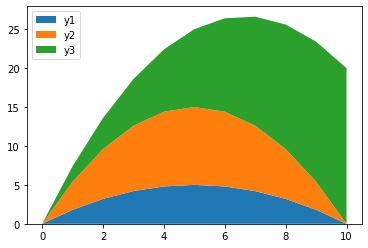

In [54]:
x = np.arange(0, 11, 1)

y1 = np.array([(-0.2)*i**2+2*i for i in x])
y2 = np.array([(-0.4)*i**2+4*i for i in x])
y3 = np.array([2*i for i in x])

labels = ["y1", "y2", "y3"]

fig, ax = plt.subplots()

ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')

plt.show()

## Stem-график

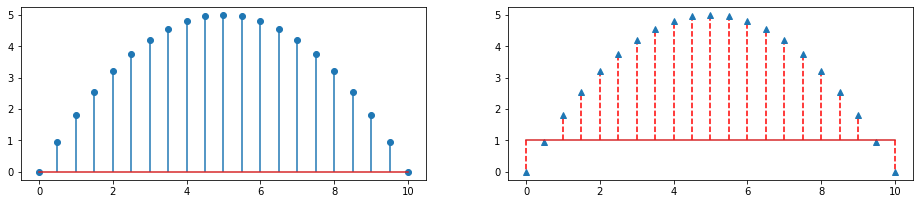

In [57]:
x = np.arange(0, 10.5, 0.5)
y = np.array([(-0.2)*i**2+2*i for i in x])

plt.figure(figsize=(16, 7))

plt.subplot(2, 2, 1)
plt.stem(x, y)

plt.subplot(2, 2, 2)
plt.stem(x, y, linefmt="r--", markerfmt="^", bottom=1)
plt.show()

## Точечный график

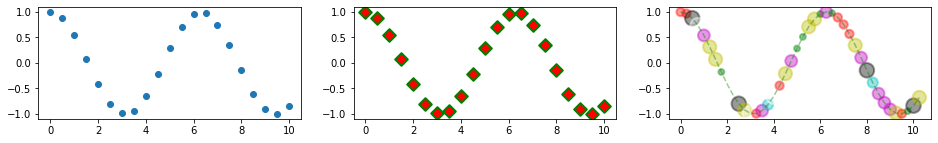

In [61]:
x = np.arange(0, 10.5, 0.5)
y = np.cos(x)

plt.figure(figsize=(16, 7))

plt.subplot(3, 3, 1)
plt.scatter(x, y)

plt.subplot(3, 3, 2)
x = np.arange(0, 10.5, 0.5)
y = np.cos(x)
plt.scatter(x, y, s=80, c="r", marker="D", linewidths=2, edgecolors="g")

plt.subplot(3, 3, 3)
bc = mcolors.BASE_COLORS
x = np.arange(0, 10.5, 0.25)
y = np.cos(x)
num_set = np.random.randint(1, len(mcolors.BASE_COLORS), len(x))
sizes = num_set * 35
colors = [list(bc.keys())[i] for i in num_set]
plt.scatter(x, y, s=sizes, alpha=0.4, c=colors, linewidths=2, edgecolors="face")
plt.plot(x, y, "g--", alpha=0.4)

plt.show()

## Столбчатые диаграммы

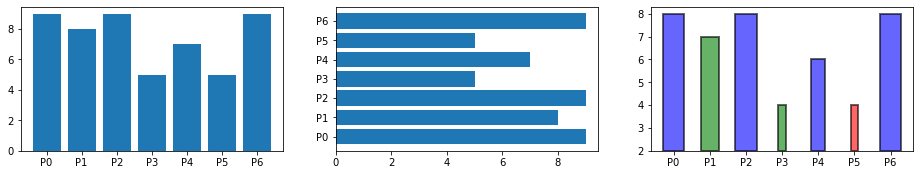

In [66]:
np.random.seed(123)

groups = [f"P{i}" for i in range(7)]
counts = np.random.randint(3, 10, len(groups))

plt.figure(figsize=(16, 9))

plt.subplot(3, 3, 1)
plt.bar(groups, counts)

plt.subplot(3, 3, 2)
plt.barh(groups, counts)

plt.subplot(3, 3, 3)
bc = mcolors.BASE_COLORS
np.random.seed(123)
groups = [f"P{i}" for i in range(7)]
counts = np.random.randint(0, len(bc), len(groups))
width = counts*0.1
colors = [["r", "b", "g"][int(np.random.randint(0, 3, 1))] for _ in counts]

plt.bar(groups, counts, width=width, alpha=0.6, bottom=2, color=colors, edgecolor="k", linewidth=2)

plt.show()

## Групповые столбчатые диаграммы

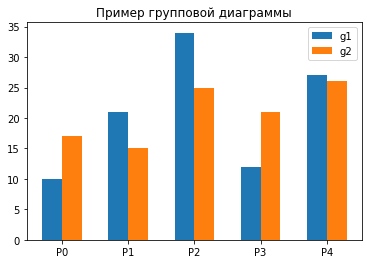

In [68]:
cat_par = [f"P{i}" for i in range(5)]
g1 = [10, 21, 34, 12, 27]
g2 = [17, 15, 25, 21, 26]
width = 0.3
x = np.arange(len(cat_par))
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, g1, width, label='g1')
rects2 = ax.bar(x + width/2, g2, width, label='g2')

ax.set_title('Пример групповой диаграммы')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()

plt.show()

## Диаграмма с errorbar элементом

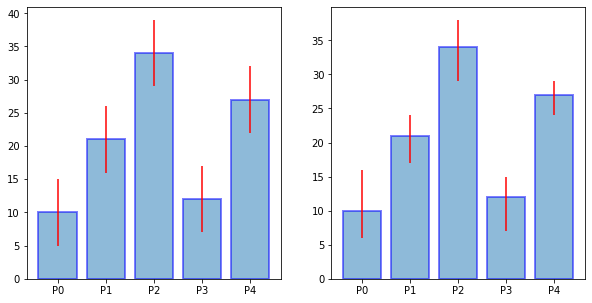

In [70]:
np.random.seed(123)

rnd = np.random.randint
cat_par = [f"P{i}" for i in range(5)]
g1 = [10, 21, 34, 12, 27]

error = np.array([[rnd(2,7),rnd(2,7)] for _ in range(len(cat_par))]).T

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(cat_par, g1, yerr=5, ecolor="r", alpha=0.5, edgecolor="b", linewidth=2)
axs[1].bar(cat_par, g1, yerr=error, ecolor="r", alpha=0.5, edgecolor="b", linewidth=2)

plt.show()

## Круговые диаграммы

### Классическая круговая диаграмма

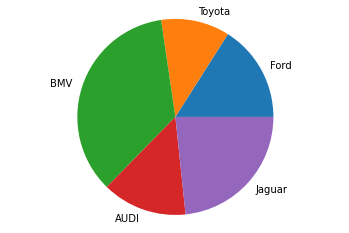

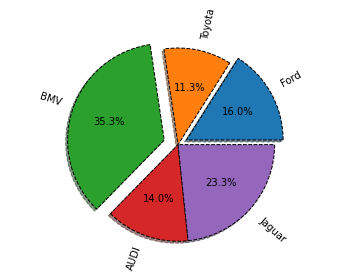

In [84]:
vals = [24, 17, 53, 21, 35]
labels = ["Ford", "Toyota", "BMV", "AUDI", "Jaguar"]
fig, ax = plt.subplots()

ax.pie(vals, labels=labels)
ax.axis("equal")
plt.show()

explode = (0.1, 0, 0.15, 0, 0)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")
plt.show()

### Вложенные круговые диаграммы

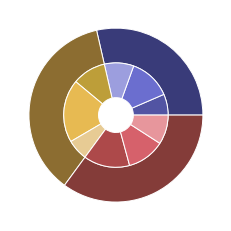

In [73]:
fig, ax = plt.subplots()
offset=0.4
data = np.array([[5, 10, 7], [8, 15, 5], [11, 9, 7]])
cmap = plt.get_cmap("tab20b")
b_colors = cmap(np.array([0, 8, 12]))
sm_colors = cmap(np.array([1, 2, 3, 9, 10, 11, 13, 14, 15]))

ax.pie(data.sum(axis=1), radius=1, colors=b_colors, wedgeprops=dict(width=offset, edgecolor='w'))
ax.pie(data.flatten(), radius=1-offset, colors=sm_colors, wedgeprops=dict(width=offset, edgecolor='w'))

plt.show()

### Круговая диаграмма в виде бублика

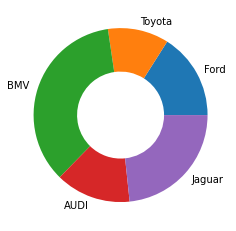

In [75]:
vals = [24, 17, 53, 21, 35]

labels = ["Ford", "Toyota", "BMV", "AUDI", "Jaguar"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, wedgeprops=dict(width=0.5))

plt.show()

## Построение цветовой сетки

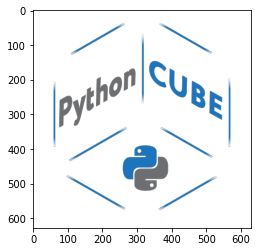

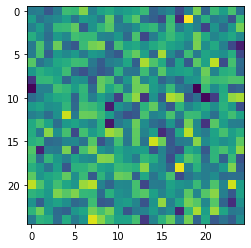

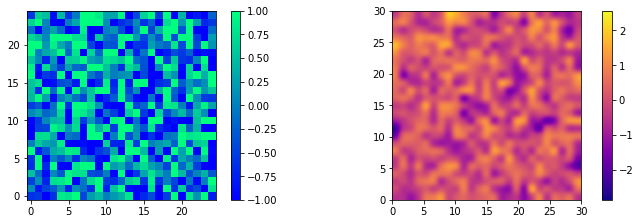

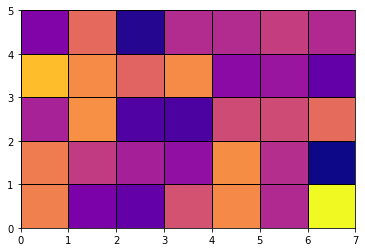

In [97]:
response = requests.get('https://dagman.ru/deyatelnost/modules/cube-dir2.png')

img = Image.open(BytesIO(response.content))

plt.imshow(img)
plt.show()

np.random.seed(32098201)
data = np.random.randn(25, 25)
plt.imshow(data)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10,3), constrained_layout=True)
p1 = axs[0].imshow(data, cmap='winter', aspect='equal', vmin=-1, vmax=1, origin="lower")
fig.colorbar(p1, ax=axs[0])
p2 = axs[1].imshow(data, cmap='plasma', aspect='equal', interpolation='gaussian', origin="lower", extent=(0, 30, 0, 30))
fig.colorbar(p2, ax=axs[1])
plt.show()

np.random.seed(123)
data = np.random.rand(5, 7)
plt.pcolormesh(data, cmap='plasma', edgecolors="k", shading='flat')
plt.show()